In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy.api as sc
import pandas as pd

%matplotlib inline


/nfs/software/stegle/users/dseaton/conda-envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
metadata_file = '../data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

sample_id    run  \
sanger_sample_id                                                             
5245STDY7352549   cellranger211_count_25419_5245STDY7352549_hg19...  25419   
5245STDY7352550   cellranger211_count_25419_5245STDY7352550_hg19...  25419   
5245STDY7352551   cellranger211_count_25419_5245STDY7352551_hg19...  25419   
5245STDY7386983   cellranger211_count_25528_5245STDY7386983_hg19...  25528   
5245STDY7386984   cellranger211_count_25528_5245STDY7386984_hg19...  25528   

                      plate_barcode date_of_submission       name    pool_id  \
sanger_sample_id                                                               
5245STDY7352549   SCGC-10X-00003100         21-02-2018    Pool1_1      pool1   
5245STDY7352550   SCGC-10X-00003101         21-02-2019    Pool1_2      pool1   
5245STDY7352551   SCGC-10X-00003102         21-02-2020  Eipl/Podx  eipl_podx   
5245STDY7386983   SCGC-10X-00003980         21-02-2021  UENN/HECN  uenn_hecn   
5245STDY7386984   SCGC-10X-00003981         21-02-2022  Pelm/Meue  pelm_meue   

                    protocol  bio_replicate_id  tech_replicate_id  \
sanger_sample_id                                                    
5245STDY7352549   da_neurons                 1                  1   
5245STDY7352550   da_neurons                 1                  2   
5245STDY7352551   da_neurons                 1                  1   
5245STDY7386983   da_neurons                 1                  1   
5245STDY7386984   da_neurons                 1                  1   

                  10x_replicate_id time_point treatment             code  \
sanger_sample_id                                                           
5245STDY7352549                  1        D11      NONE  5245STDY7352549   
5245STDY7352550                  1        D11      NONE  5245STDY7352550   
5245STDY7352551                  1        D11      NONE  5245STDY7352551   
5245STDY7386983                  1        D11      NONE  5245STDY7386983   
5245STDY7386984                  1        D11      NONE  5245STDY7386984   

                  sequencescape sanger_sample_id number_of_cells_loaded  \
sanger_sample_id                                                          
5245STDY7352549       3571764.0  5245STDY7352549                  15480   
5245STDY7352550       3571765.0  5245STDY7352550                  11390   
5245STDY7352551       3571766.0  5245STDY7352551                  17812   
5245STDY7386983       3606205.0  5245STDY7386983                  11600   
5245STDY7386984       3606206.0  5245STDY7386984                  19400   

                 percentage_survival  comment  
sanger_sample_id                               
5245STDY7352549                 94.4      NaN  
5245STDY7352550                 91.9      NaN  
5245STDY7352551                 94.4      NaN  
5245STDY7386983                   93      NaN  
5245STDY7386984                   97      NaN

In [59]:
# file = '../data/data_processed/pool1_4.w_metadata.scanpy.h5'
# file = '../data/data_processed/pool1_9_subsample/pool1_9_subsample.scanpy.w_metadata.scanpy.h5'
# file = '../data/data_processed/pool1_9_subsample/pool1_9_subsample.scanpy.w_metadata0.05ofcells.scanpy.h5'
# file = '../data/data_processed/pool10_11/pool10_11.scanpy.w_metadata.scanpy.h5'
# file = '../data/data_processed/individual_differentiations/individual_differentiations.scanpy.w_metadata.scanpy.h5'
# file = '../data/data_processed/pool5_12_D52/pool5_12_D52.scanpy.w_metadata.scanpy.h5'
# file = '../data/data_processed/pool12/pool12.scanpy.w_metadata.scanpy.h5'
# file = '../data/data_processed/pool1_9_D52.scanpy.dimreduction.subsample_cells.PCA.clustered.h5'
# file = '../data/data_processed/pool1_9_D52.scanpy.dimreduction.subsample_cells.harmonyPCA.clustered.h5'
#file = '../data/data_processed/pool1_9_D52.scanpy.w_metadata.scanpy.h5'
# file = '../data/data_processed/pool10_13/pool10_13.scanpy.w_metadata.scanpy.h5'
#file = '../data/data_processed/pool10_13/pool10_13.scanpy.w_metadata.scanpy.h5'
#file = '../data/data_processed/pool1_13_noddd_subsample/pool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters.h5'
file = '../data/data_processed/pool1_13_noddd_subsample/pool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters.0.25ofcells.h5'
# file = '../data/data_processed/pool1_9.w_metadata.0.05ofcells.scanpy.h5'
adatafull = sc.read(file)



Only considering the two last: ['.25ofcells', '.h5'].
Only considering the two last: ['.25ofcells', '.h5'].


In [60]:
adatafull.n_obs

49331

In [61]:
adatafull.obs.head()

batch          donor_id        sample_id  cluster_id  \
index                                                                          
AGAATAGCATTAACCG-1-143    143  HPSI0613i-oesx_3  5245STDY7982707           5   
CCCAATCAGTAAGTAC-1-26      26  HPSI1014i-eesb_1  5245STDY7520698           1   
CACAAACAGTGTTGAA-1-69      69  HPSI1013i-sita_1  5245STDY7632695           0   
GGCGACTTCTTCATGT-1-61      61  HPSI0514i-fiaj_1  5245STDY7631343           4   
GGGCACTGTCACTGGC-1-69      69  HPSI0414i-uawq_2  5245STDY7632695           0   

                       time_point pool_id treatment  n_counts_all  \
index                                                               
AGAATAGCATTAACCG-1-143        D52  pool12       ROT         616.0   
CCCAATCAGTAAGTAC-1-26         D30   pool4      NONE        7549.0   
CACAAACAGTGTTGAA-1-69         D11   pool8      NONE       15339.0   
GGCGACTTCTTCATGT-1-61         D52   pool5       ROT        7141.0   
GGGCACTGTCACTGGC-1-69         D11   pool8      NONE       15732.0   

                            cell_barcode         new_cluster_id  \
index                                                             
AGAATAGCATTAACCG-1-143  AGAATAGCATTAACCG  pool1_13_noddd_D52_12   
CCCAATCAGTAAGTAC-1-26   CCCAATCAGTAAGTAC   pool1_13_noddd_D30_0   
CACAAACAGTGTTGAA-1-69   CACAAACAGTGTTGAA   pool1_13_noddd_D11_0   
GGCGACTTCTTCATGT-1-61   GGCGACTTCTTCATGT   pool1_13_noddd_D52_9   
GGGCACTGTCACTGGC-1-69   GGGCACTGTCACTGGC   pool1_13_noddd_D11_0   

                                    celltype  
index                                         
AGAATAGCATTAACCG-1-143        FP_progenitors  
CCCAATCAGTAAGTAC-1-26   dopaminergic_neurons  
CACAAACAGTGTTGAA-1-69            progenitors  
GGCGACTTCTTCATGT-1-61              unknown_2  
GGGCACTGTCACTGGC-1-69            progenitors

In [62]:

fig_prefix = os.path.basename(file).replace('.h5','')
gene_tsne_fig_prefix = '_gene_expression/'+os.path.basename(file).replace('.h5','')
if not os.path.exists('./figures/tsne_gene_expression'):
    os.mkdir('./figures/tsne_gene_expression')


In [64]:
#subsample

fraction = 0.50
adata = sc.pp.subsample(adatafull, fraction, copy=True)

# selected_pools = ['pool10','pool11','pool12']
# adata = adatafull[adatafull.obs['pool_id'].isin(selected_pools),: ]


# log quantification data and store as "raw"
adata.raw = sc.pp.log1p(adata, copy=True)

In [65]:
# # mito_genes = adata.var_names.str.startswith('MT-')
# adata.var['mito'] = [x.startswith('MT-') for x in adata.var.index]

# sc.pp.calculate_qc_metrics(adata, inplace=True, qc_vars=['mito'])

# adata.obs.head()

In [66]:
# # sc.pl.violin(adata, ['log1p_n_genes_by_counts', 'pct_counts_in_top_50_genes', 'pct_counts_mito'],
# #              jitter=0.4, multi_panel=True)

# sc.pl.violin(adata,['pct_counts_mito'], groupby='cluster_id',jitter=0.4)

# #sc.pl.violin(adata,['pct_counts_in_top_50_genes'], groupby='cluster_id',jitter=0.4)

# # sc.pl.violin(adata,['log1p_n_genes_by_counts'], groupby='cluster_id',jitter=0.4)

In [67]:
# sc.pl.scatter(adata, x='n_counts_all', y='pct_counts_mito')
# sc.pl.scatter(adata, x='n_counts_all', y='pct_counts_in_top_50_genes')

In [68]:
# sc.pl.violin(adata[adata.obs['time_point']=='D52'],['pct_counts_mito'], groupby='treatment',jitter=0.4)


In [69]:
# adata.obs['treatment'] = adata.obs['sample_id'].apply(lambda x: metadata_df.loc[x,'treatment'])
# adata.obs['time_point'] = adata.obs['sample_id'].apply(lambda x: metadata_df.loc[x,'time_point'])
# adata.obs['pool_id'] = adata.obs['sample_id'].apply(lambda x: metadata_df.loc[x,'pool_id'])

In [70]:
# new_obs_df = pd.read_csv('../data/data_processed/pool1_9_subsample/pool1_9_subsample.scanpy.w_metadata.scanpy.obs_df.mapped_to_new_clusters.tsv',
#                         sep='\t', index_col=0)
# new_obs_df.head()

In [71]:
# make cluster ID strings
# adata.obs['cluster_id'] = adata.obs['louvain'].apply(lambda x : str(int(x)))
adata.obs['cluster_id'] = adata.obs['cluster_id'].apply(lambda x : str(int(x)))
# adata.obs['cluster_id'] = new_obs_df.loc[adata.obs.index, 'new_cluster_id']
adata.obs['donor_pool_id'] = adata.obs['donor_id'].astype(str) + '_' + adata.obs['pool_id'].astype(str)

In [72]:
# def label_cell_lines(row):
#     if row['donor_id'] != 'HPSI0114i-kolf_2':
#         return 'Other cell line'
#     elif row['pool_id'] =='pool10':
#         return 'kolf_2 (WT)'
#     elif row['pool_id'] =='pool11':
#         return 'kolf_2 (ASXL3 KO)'

def label_cell_lines(row):
    if row['donor_pool_id'] == 'HPSI0114i-kolf_2_pool10':
        return row['donor_pool_id'] + ' (WT)'
    elif row['donor_pool_id'] == 'HPSI0114i-kolf_2_pool11':
        return row['donor_pool_id'] + ' (ASXL3)'
    elif row['donor_pool_id'] == 'HPSI0114i-kolf_2_pool12':
        return row['donor_pool_id'] + ' (SNCA)'
    else:
        return 'Other donor'
#        return row['donor_pool_id']


adata.obs['label'] = adata.obs.apply(label_cell_lines, axis=1)
adata.uns['label_colors'] = ['b','r','g','c']


In [73]:
# print header of metadata

adata.obs.head()

batch          donor_id        sample_id cluster_id  \
index                                                                         
CTCGTCAGTAAATGTG-1-101    101  HPSI0215i-zett_5  5245STDY7685559          3   
AACTGGTCATTATCTC-1-80      80  HPSI1013i-hiaf_1  5245STDY7654675          5   
CTCGGAGGTTCCTCCA-1-3        3  HPSI0514i-uenn_3  5245STDY7386986          0   
GTTCTCGCATAACCTG-1-102    102  HPSI0414i-uawq_2  5245STDY7685560          2   
GAAATGAAGAAGGTGA-1-9        9  HPSI0214i-pelm_3  5245STDY7423248          2   

                       time_point pool_id treatment  n_counts_all  \
index                                                               
CTCGTCAGTAAATGTG-1-101        D52   pool8      NONE        4778.0   
AACTGGTCATTATCTC-1-80         D30   pool6      NONE        9276.0   
CTCGGAGGTTCCTCCA-1-3          D11   pool2      NONE       10794.0   
GTTCTCGCATAACCTG-1-102        D52   pool8      NONE       17208.0   
GAAATGAAGAAGGTGA-1-9          D30   pool3      NONE        9964.0   

                            cell_barcode        new_cluster_id  \
index                                                            
CTCGTCAGTAAATGTG-1-101  CTCGTCAGTAAATGTG  pool1_13_noddd_D52_5   
AACTGGTCATTATCTC-1-80   AACTGGTCATTATCTC  pool1_13_noddd_D30_1   
CTCGGAGGTTCCTCCA-1-3    CTCGGAGGTTCCTCCA  pool1_13_noddd_D11_0   
GTTCTCGCATAACCTG-1-102  GTTCTCGCATAACCTG  pool1_13_noddd_D52_4   
GAAATGAAGAAGGTGA-1-9    GAAATGAAGAAGGTGA  pool1_13_noddd_D30_2   

                                    celltype           donor_pool_id  \
index                                                                  
CTCGTCAGTAAATGTG-1-101        astrocyte_like  HPSI0215i-zett_5_pool8   
AACTGGTCATTATCTC-1-80         astrocyte_like  HPSI1013i-hiaf_1_pool6   
CTCGGAGGTTCCTCCA-1-3             progenitors  HPSI0514i-uenn_3_pool2   
GTTCTCGCATAACCTG-1-102  serotonergic_neurons  HPSI0414i-uawq_2_pool8   
GAAATGAAGAAGGTGA-1-9    serotonergic_neurons  HPSI0214i-pelm_3_pool3   

                              label  
index                                
CTCGTCAGTAAATGTG-1-101  Other donor  
AACTGGTCATTATCTC-1-80   Other donor  
CTCGGAGGTTCCTCCA-1-3    Other donor  
GTTCTCGCATAACCTG-1-102  Other donor  
GAAATGAAGAAGGTGA-1-9    Other donor

In [74]:
df = adata.obs[['donor_id']].drop_duplicates().sort_values(by='donor_id')
df['donor_index'] = range(1,df.shape[0]+1)
df = df.set_index('donor_id')
adata.obs['donor_index'] = adata.obs['donor_id'].apply(lambda x: df.loc[x,'donor_index'])
adata.obs.head()

batch          donor_id        sample_id cluster_id  \
index                                                                         
CTCGTCAGTAAATGTG-1-101    101  HPSI0215i-zett_5  5245STDY7685559          3   
AACTGGTCATTATCTC-1-80      80  HPSI1013i-hiaf_1  5245STDY7654675          5   
CTCGGAGGTTCCTCCA-1-3        3  HPSI0514i-uenn_3  5245STDY7386986          0   
GTTCTCGCATAACCTG-1-102    102  HPSI0414i-uawq_2  5245STDY7685560          2   
GAAATGAAGAAGGTGA-1-9        9  HPSI0214i-pelm_3  5245STDY7423248          2   

                       time_point pool_id treatment  n_counts_all  \
index                                                               
CTCGTCAGTAAATGTG-1-101        D52   pool8      NONE        4778.0   
AACTGGTCATTATCTC-1-80         D30   pool6      NONE        9276.0   
CTCGGAGGTTCCTCCA-1-3          D11   pool2      NONE       10794.0   
GTTCTCGCATAACCTG-1-102        D52   pool8      NONE       17208.0   
GAAATGAAGAAGGTGA-1-9          D30   pool3      NONE        9964.0   

                            cell_barcode        new_cluster_id  \
index                                                            
CTCGTCAGTAAATGTG-1-101  CTCGTCAGTAAATGTG  pool1_13_noddd_D52_5   
AACTGGTCATTATCTC-1-80   AACTGGTCATTATCTC  pool1_13_noddd_D30_1   
CTCGGAGGTTCCTCCA-1-3    CTCGGAGGTTCCTCCA  pool1_13_noddd_D11_0   
GTTCTCGCATAACCTG-1-102  GTTCTCGCATAACCTG  pool1_13_noddd_D52_4   
GAAATGAAGAAGGTGA-1-9    GAAATGAAGAAGGTGA  pool1_13_noddd_D30_2   

                                    celltype           donor_pool_id  \
index                                                                  
CTCGTCAGTAAATGTG-1-101        astrocyte_like  HPSI0215i-zett_5_pool8   
AACTGGTCATTATCTC-1-80         astrocyte_like  HPSI1013i-hiaf_1_pool6   
CTCGGAGGTTCCTCCA-1-3             progenitors  HPSI0514i-uenn_3_pool2   
GTTCTCGCATAACCTG-1-102  serotonergic_neurons  HPSI0414i-uawq_2_pool8   
GAAATGAAGAAGGTGA-1-9    serotonergic_neurons  HPSI0214i-pelm_3_pool3   

                              label donor_index  
index                                            
CTCGTCAGTAAATGTG-1-101  Other donor          43  
AACTGGTCATTATCTC-1-80   Other donor         159  
CTCGGAGGTTCCTCCA-1-3    Other donor          87  
GTTCTCGCATAACCTG-1-102  Other donor          63  
GAAATGAAGAAGGTGA-1-9    Other donor          33

In [75]:

fig_format = 'png'
# fig_format = 'pdf'
sc.set_figure_params(dpi_save=200,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 6,4

In [76]:
plotting_fcn = sc.pl.umap

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters.0.25ofcells_tsne_by_celltype.png


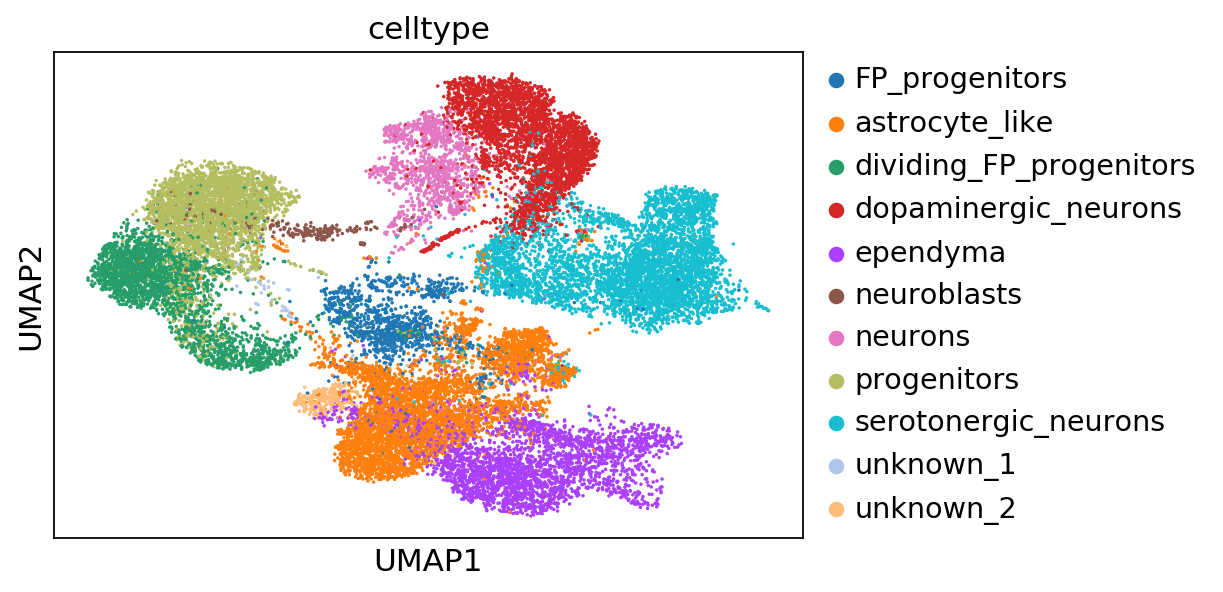

In [79]:
plotting_fcn(adata, color='celltype', save=fig_prefix+'_tsne_by_celltype.png',size=10)

In [77]:
# sc.pl.tsne(adata, color=['MKI67','CCNB1'], use_raw=True)

gene_list = ['LMX1A','FOXA2','DDC',
'EN2','CORIN','NEUROG2','SNAP25','SYT1','WNT1','MSX2','DBX1','WNT8B','BARHL1','PITX2','TH','DDC',
'SLC18A2','NR4A2','ALDH1A1','SOX6','OTX2','PITX3','MAPT','LRKK2','PINK1','SNCA',
'ATP13A2','PLA2G6','FBOX7','VPS35']

# gene_list = ['PAX2','PAX5','LMX1B']
# gene_list = ['SLC6A3','SLC18A2','DRD2','AADC','TH','DDC']
#gene_list = ['SNCA','PINK1','ATP13A2','MAPT']
gene_list = ['TH','DDC']

# gene_list = ['GFAP','S100B','FABP7','STOML3','DNALI1','TTR','MKI67','TOP2A']

# gene_list = ['ASXL3']
# gene_list = ['HOXA7','HOXA10','HOXA11','HOXA13']
# gene_list = ['POSTN','PSG4','HAPL1','SORBS2']


# gene_list = ['EN1','EN2']
# gene_list = ['COX{}'.format(x) for x in range(1,9)]
# gene_list += [x+'A' for x in gene_list] + [x+'B' for x in gene_list]
# gene_list += ['NDUFA{}'.format(x) for x in range(1,12)]
# gene_list += ['NDUFB{}'.format(x) for x in range(1,12)]

for gene in gene_list[:]:
    try:
        plotting_fcn(adata, color=[gene], use_raw=True, save=gene_tsne_fig_prefix+'_{}.{}'.format(gene, fig_format),color_map='plasma_r',size=10)
    except:
        print(gene)

rcParams['figure.figsize'] = 6,4

# sc.pl.tsne(adata, color=['TH','PBX1'], use_raw=True)
# sc.pl.tsne(adata, color=['NHLH1','CALB2'], use_raw=True)
# sc.pl.tsne(adata, color=['NEUROD1','NHLH1'], use_raw=True)
# sc.pl.tsne(adata, color=['CALB1','KCNJ6'], use_raw=True)

... storing 'cluster_id' as categorical
... storing 'donor_pool_id' as categorical
... storing 'label' as categorical


TH
DDC


saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_batch.png


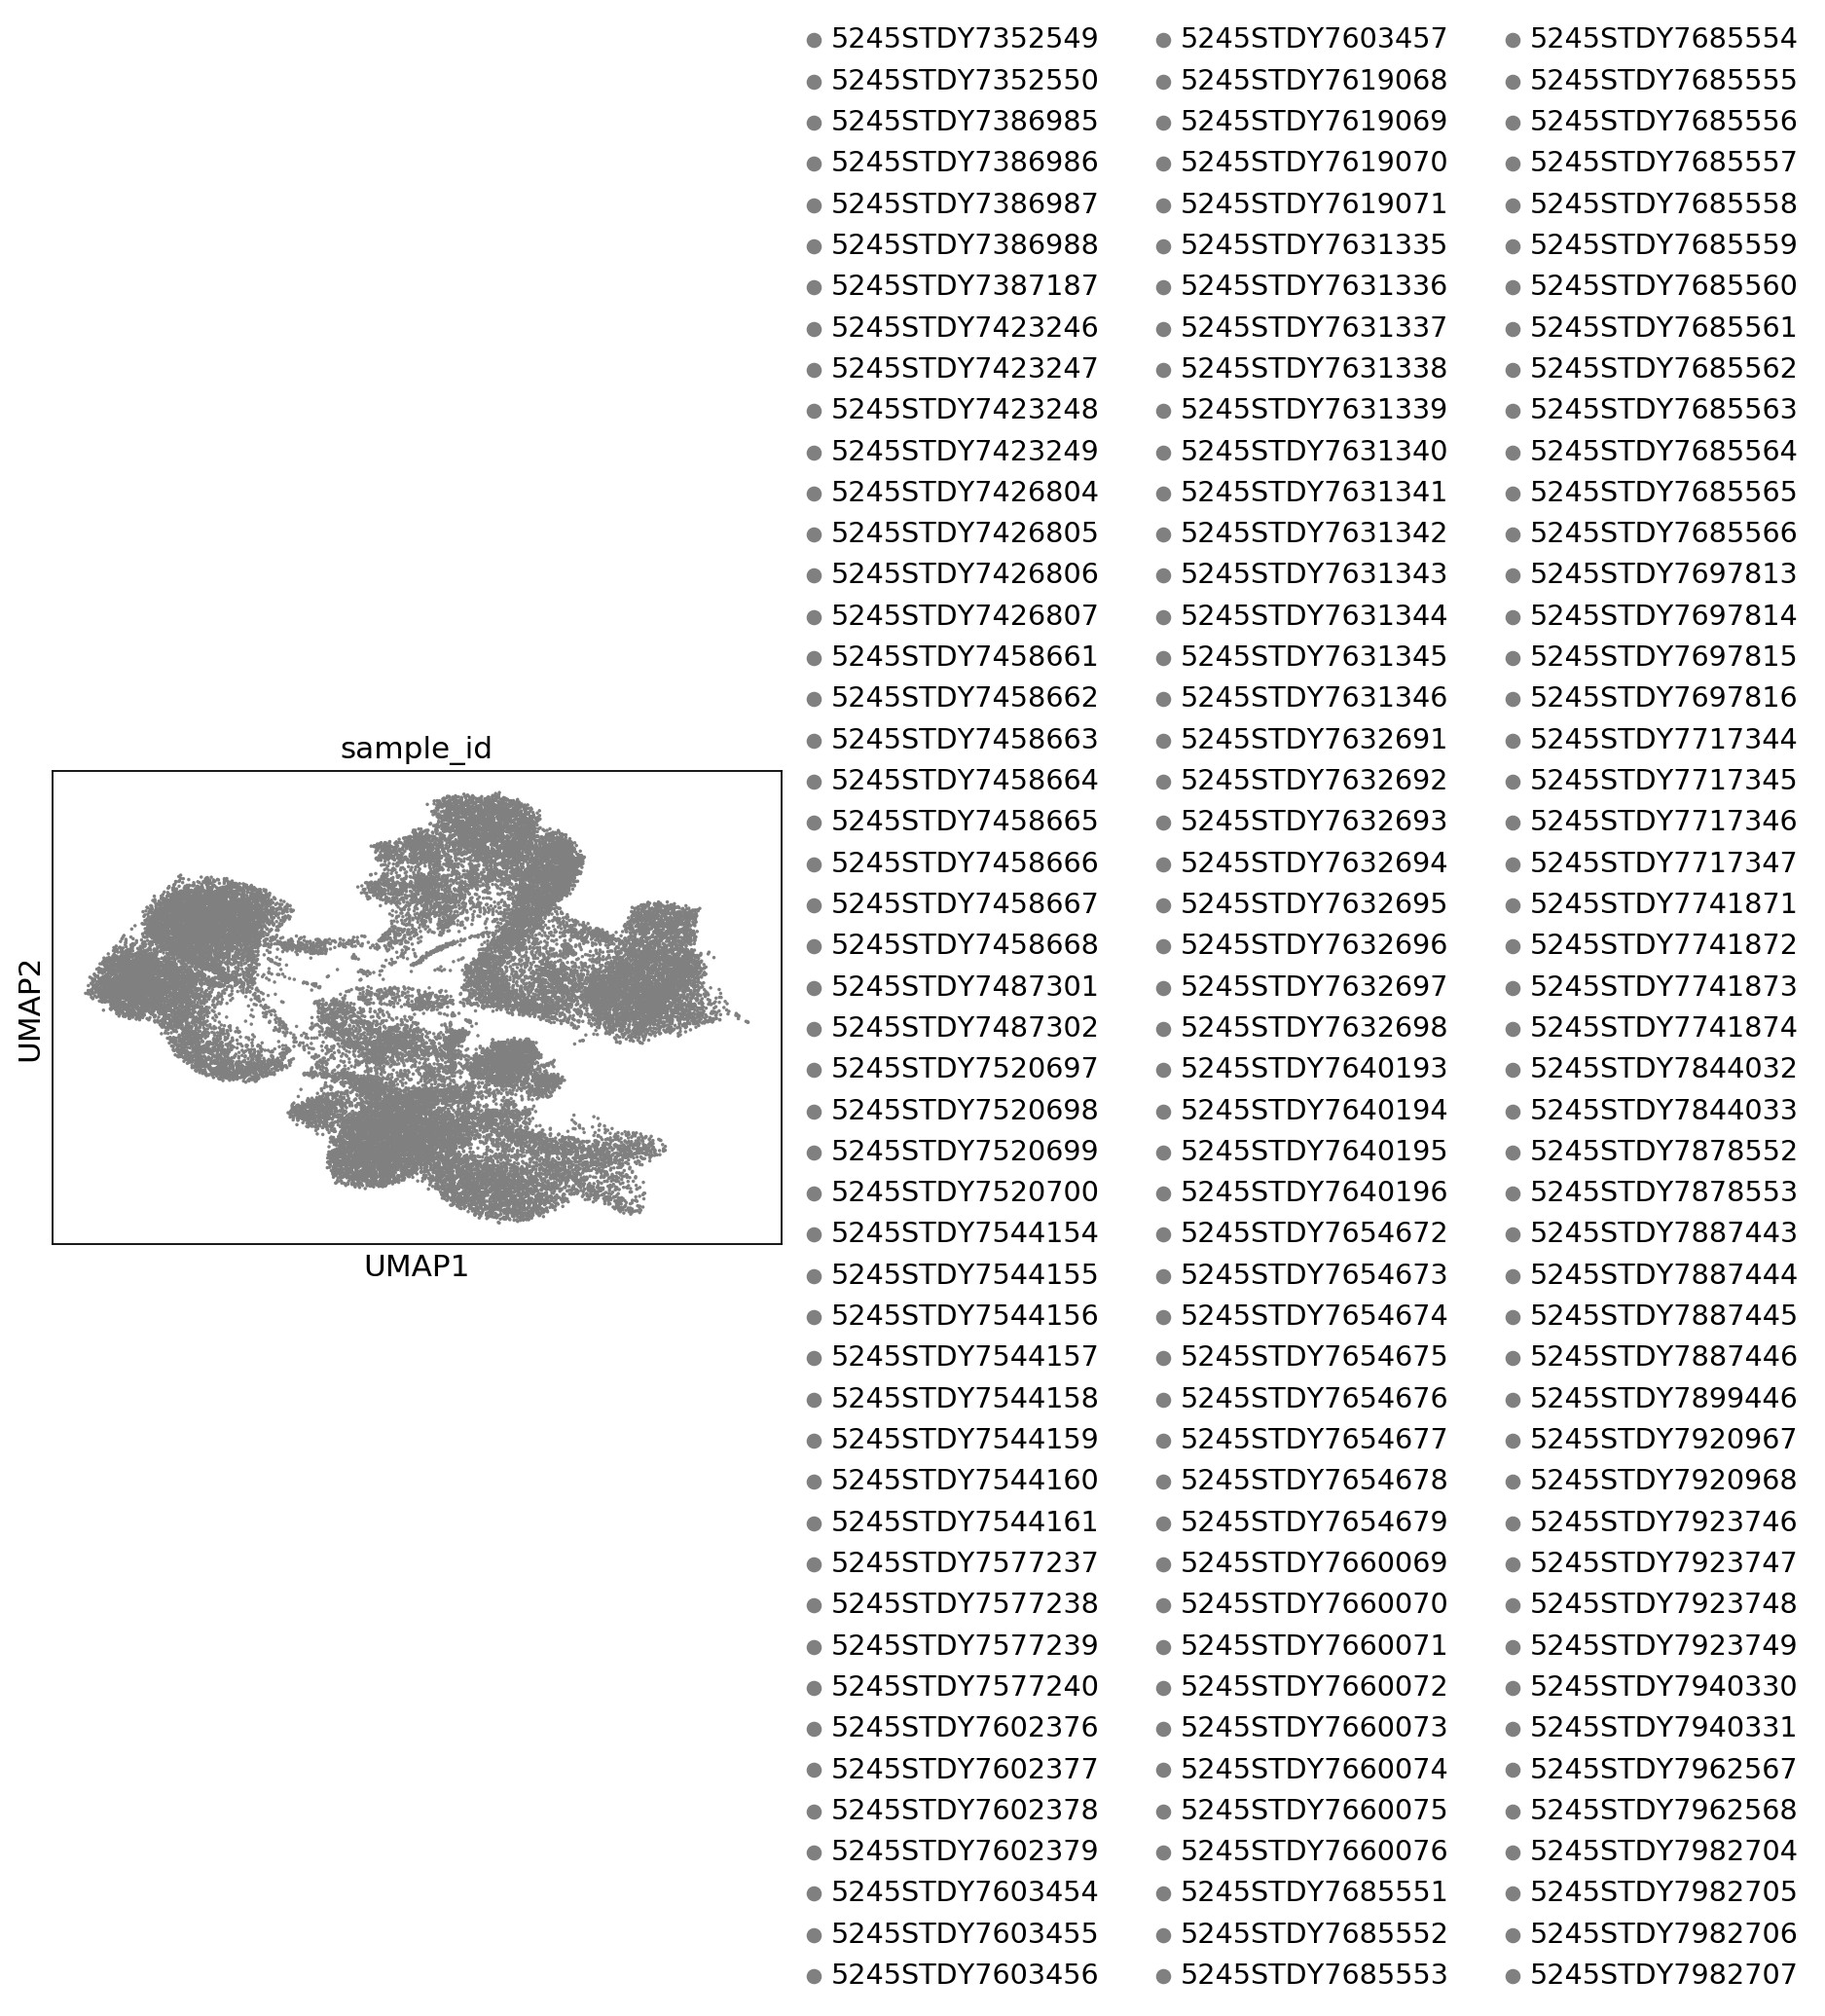

In [43]:
plotting_fcn(adata, color='sample_id', save=fig_prefix+'_tsne_by_batch.png',size=10)

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_donor.png


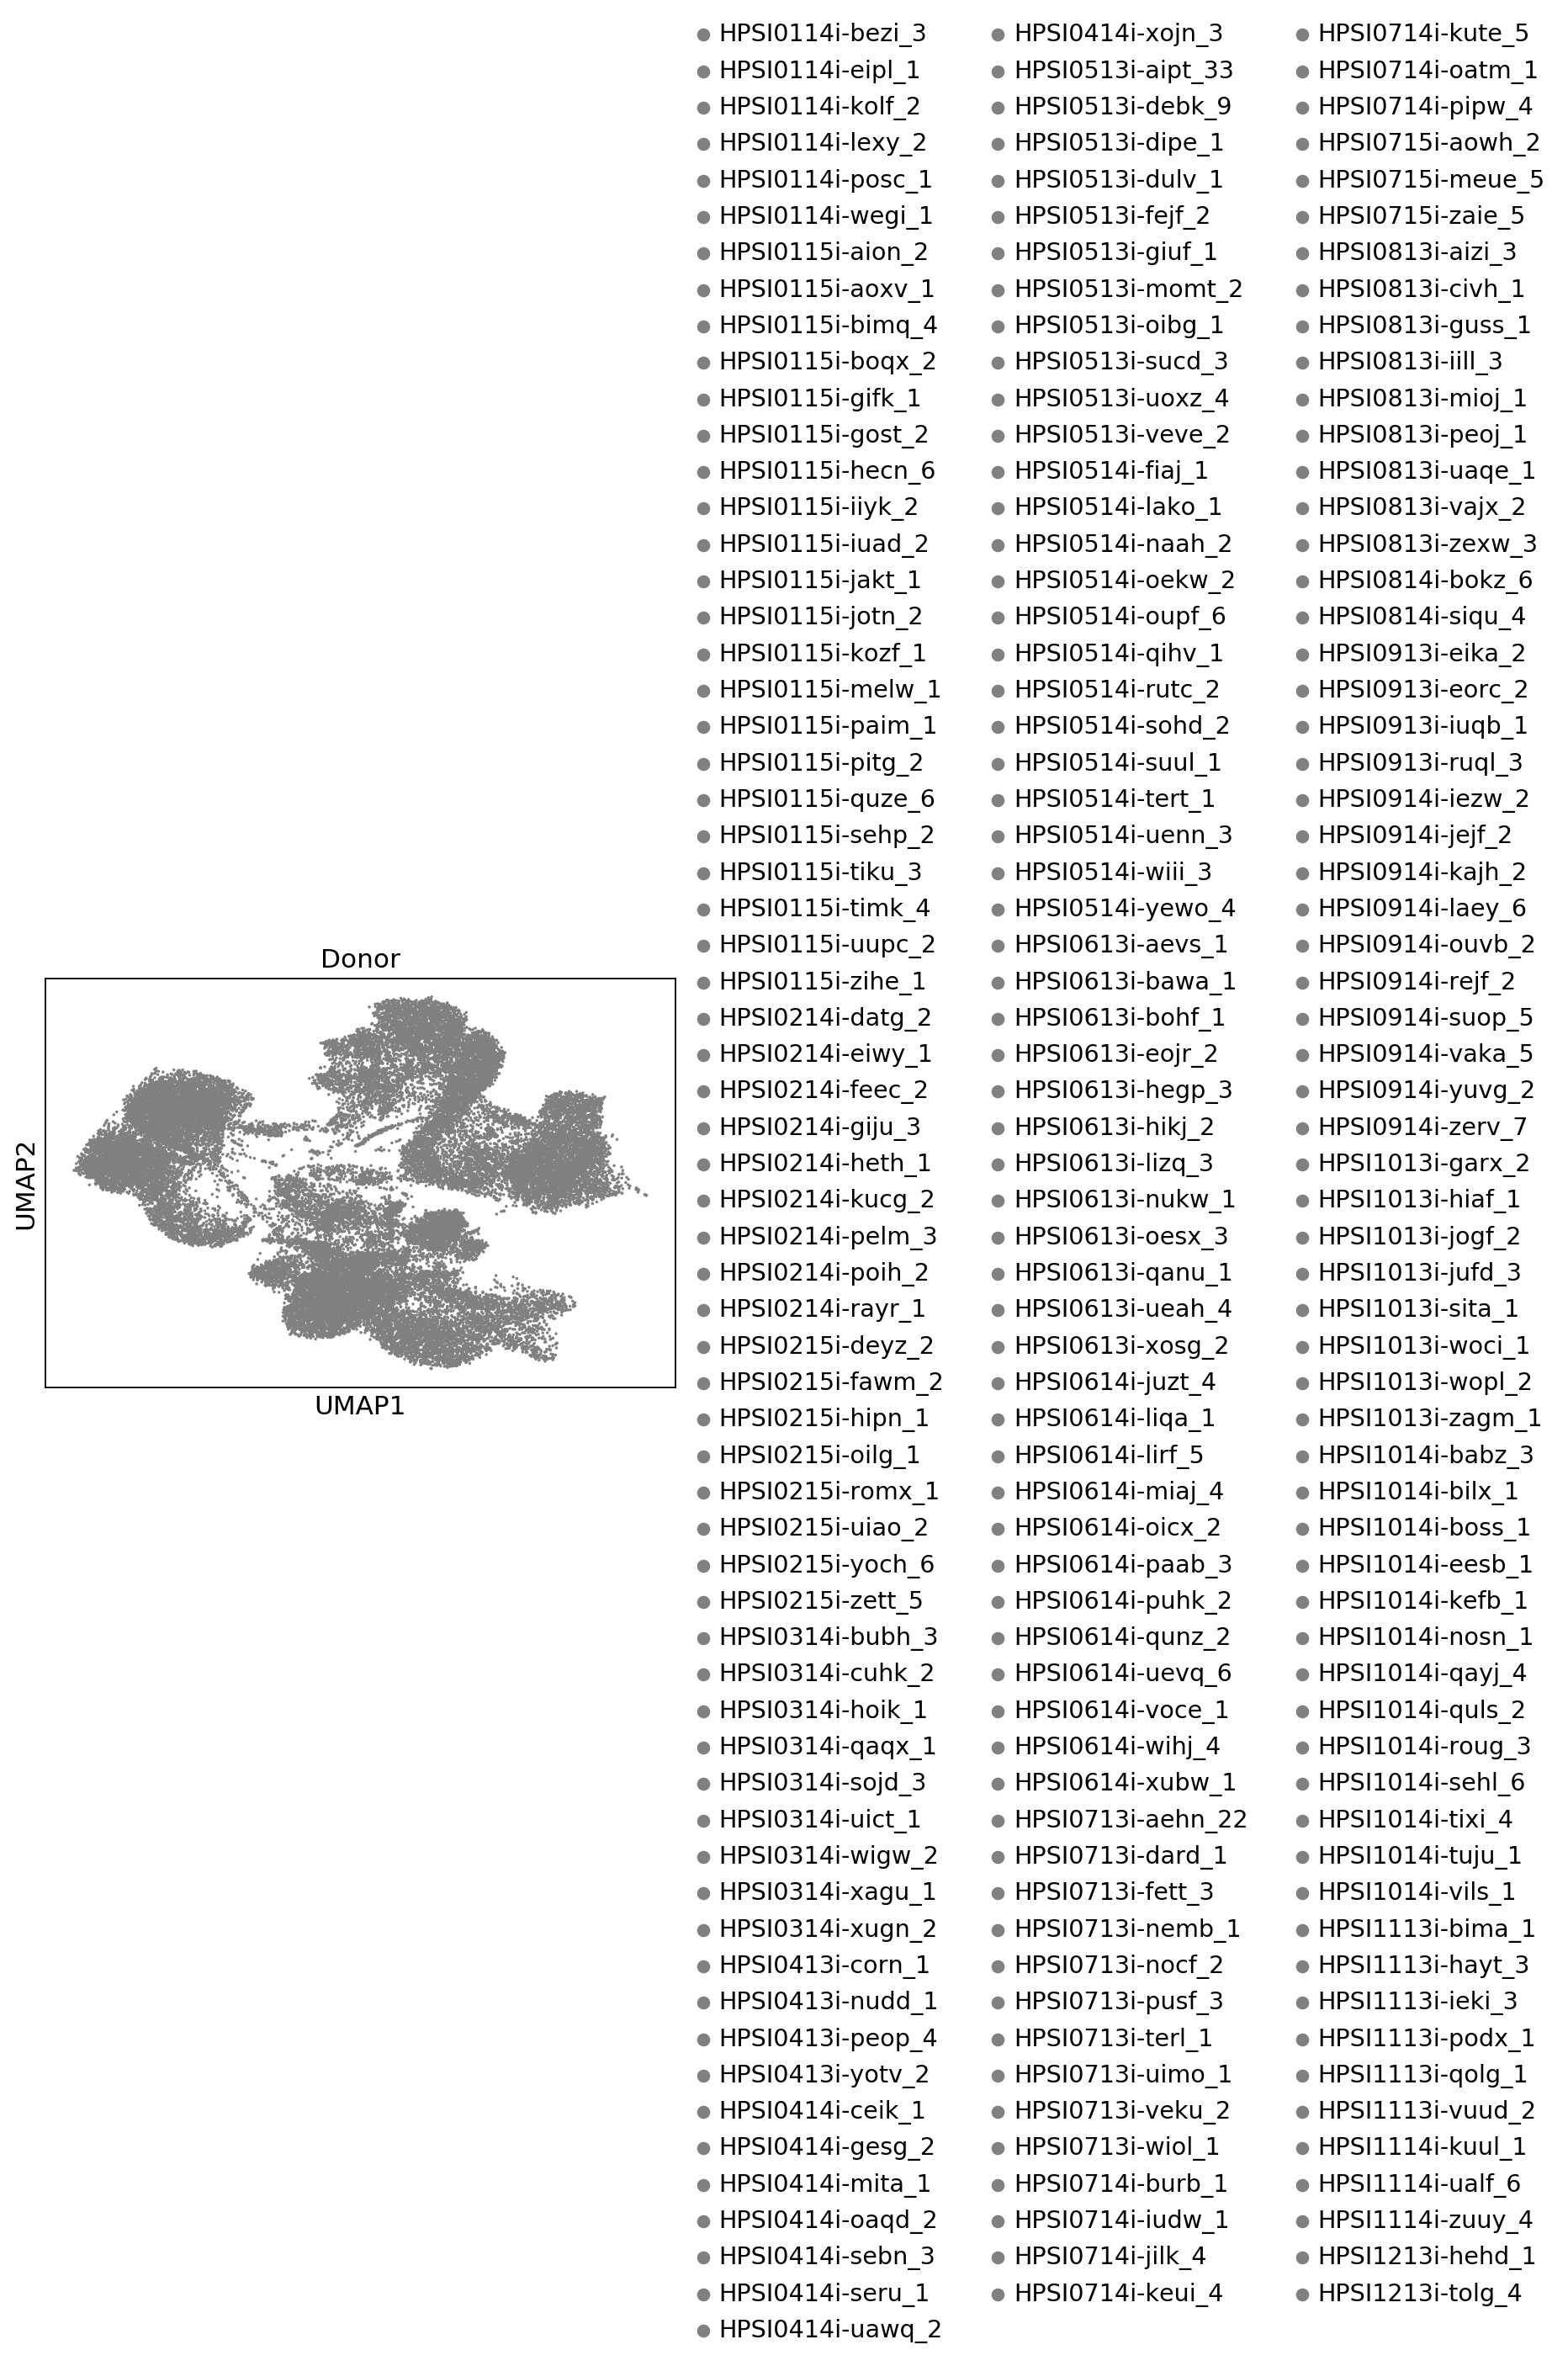

In [44]:
plotting_fcn(adata, color='donor_id', save=fig_prefix+'_tsne_by_donor.png', title='Donor',size=10)

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_KO_label.png


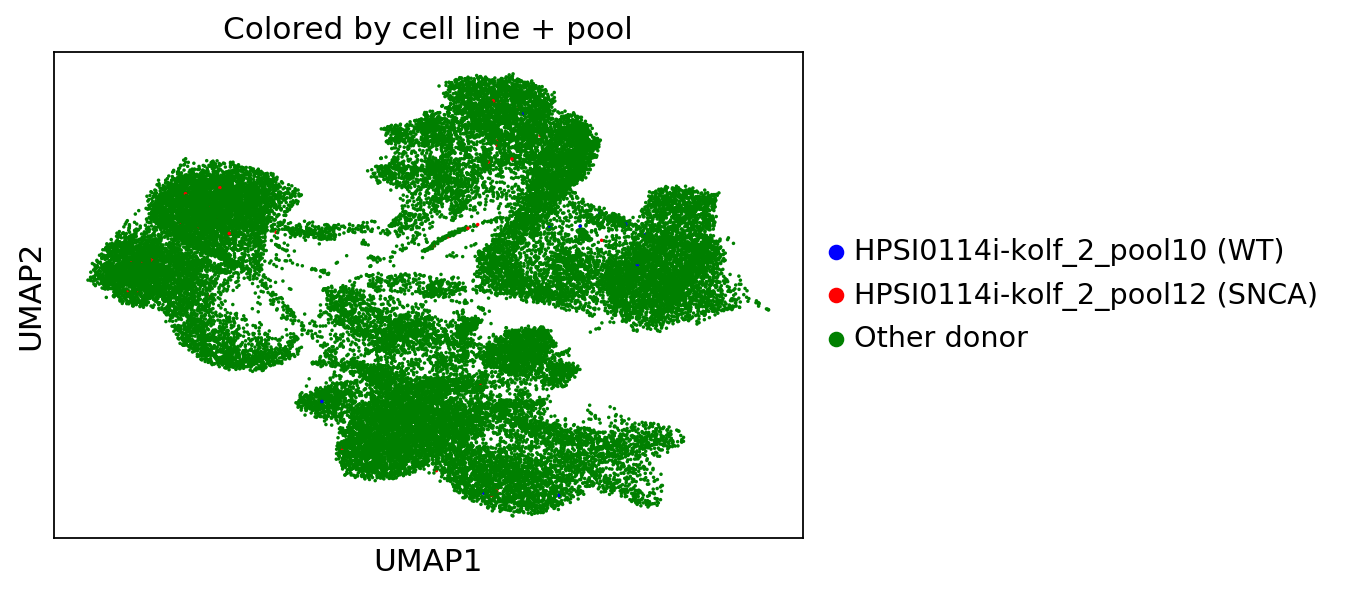

In [45]:
plotting_fcn(adata, color='label', save=fig_prefix+'_tsne_by_KO_label.png', title='Colored by cell line + pool',size=10)

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_time_point.png


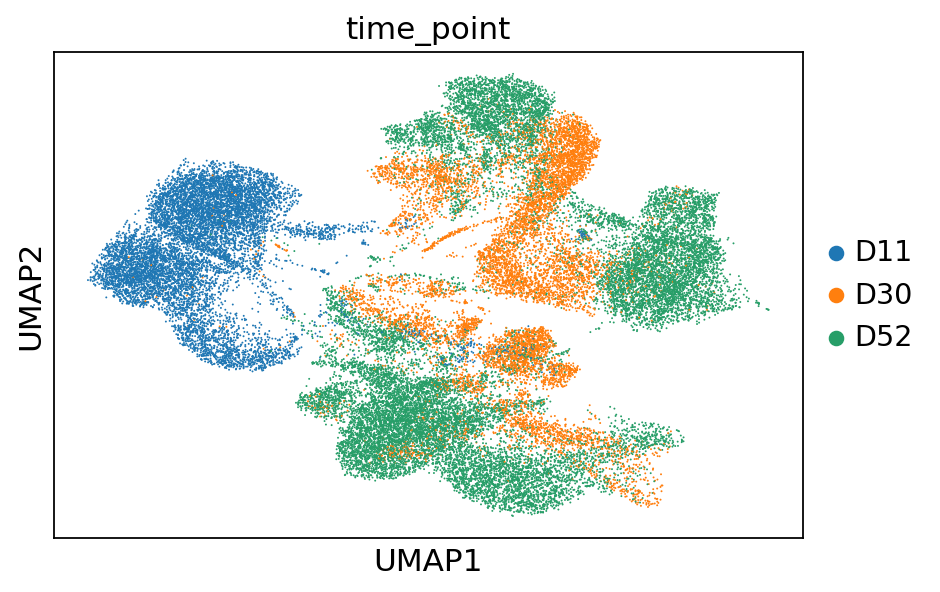

In [46]:
plotting_fcn(adata, color='time_point', save=fig_prefix+'_tsne_by_time_point.png')

... storing 'treatment' as categorical


saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_umap_by_treatment.png


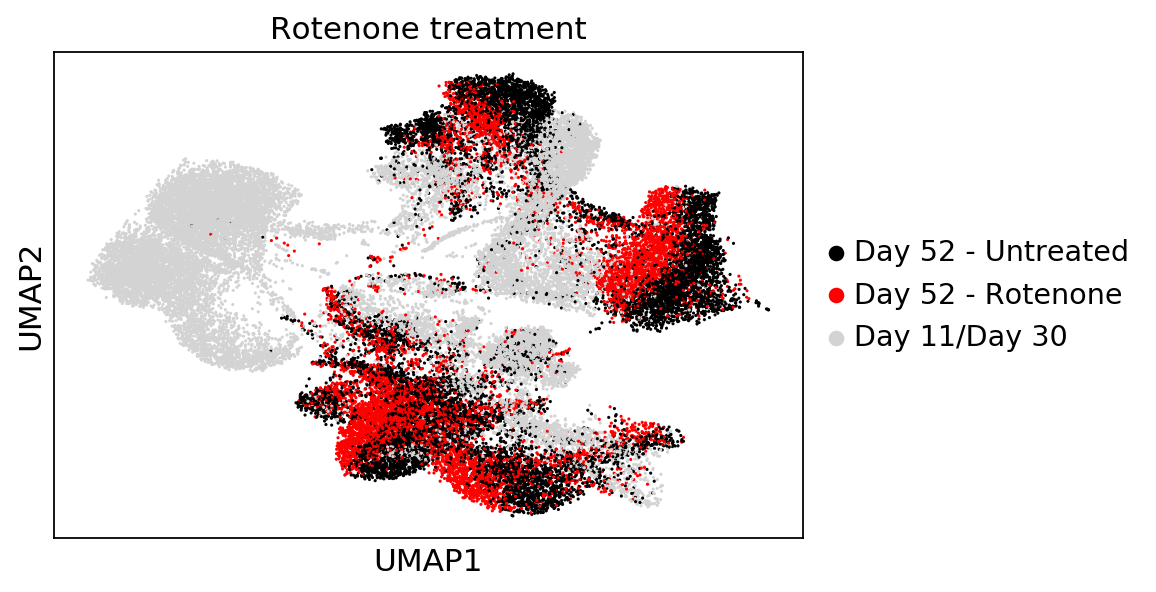

In [47]:
label_dict = {'NONE':'Day 52 - Untreated', 'ROT':'Day 52 - Rotenone','NA':'Day 11/Day 30'}

adata.obs['treatment'] = adata.obs.apply(lambda x: x.loc['treatment'] if (x.loc['time_point']=="D52") else 'NA', axis=1)
adata.obs['treatment_label'] = adata.obs['treatment'].apply(lambda x: label_dict[x])
adata.obs['treatment_label'] = pd.Categorical(adata.obs['treatment_label'],
                                              ['Day 52 - Untreated', 'Day 52 - Rotenone', 'Day 11/Day 30'])
# adata.obs.head()
plotting_fcn(adata, color='treatment_label', save=fig_prefix+'_umap_by_treatment.png', palette=['k','r','lightgrey'], size=8, title='Rotenone treatment')

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_pool_id.png


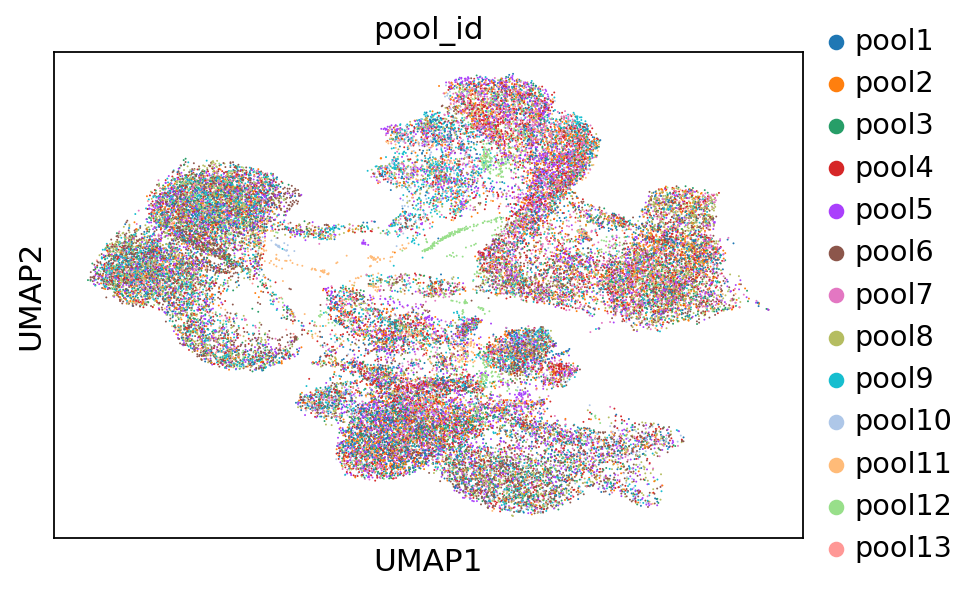

In [48]:
plotting_fcn(adata, color='pool_id', save=fig_prefix+'_tsne_by_pool_id.png')

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_cluster_id_louvain.png


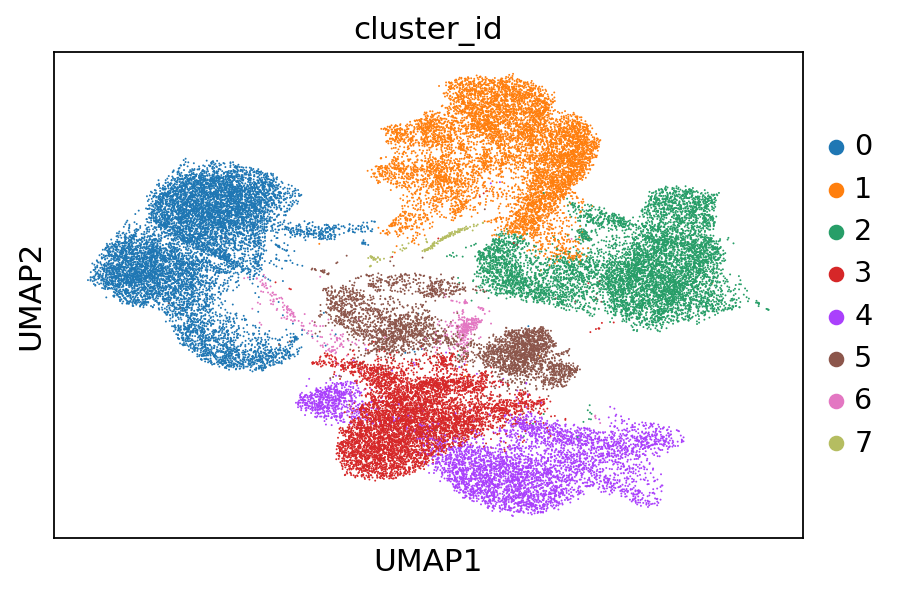

In [49]:
plotting_fcn(adata, color='cluster_id', save=fig_prefix+'_tsne_by_cluster_id_louvain.png')

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_cluster_id_louvain.png


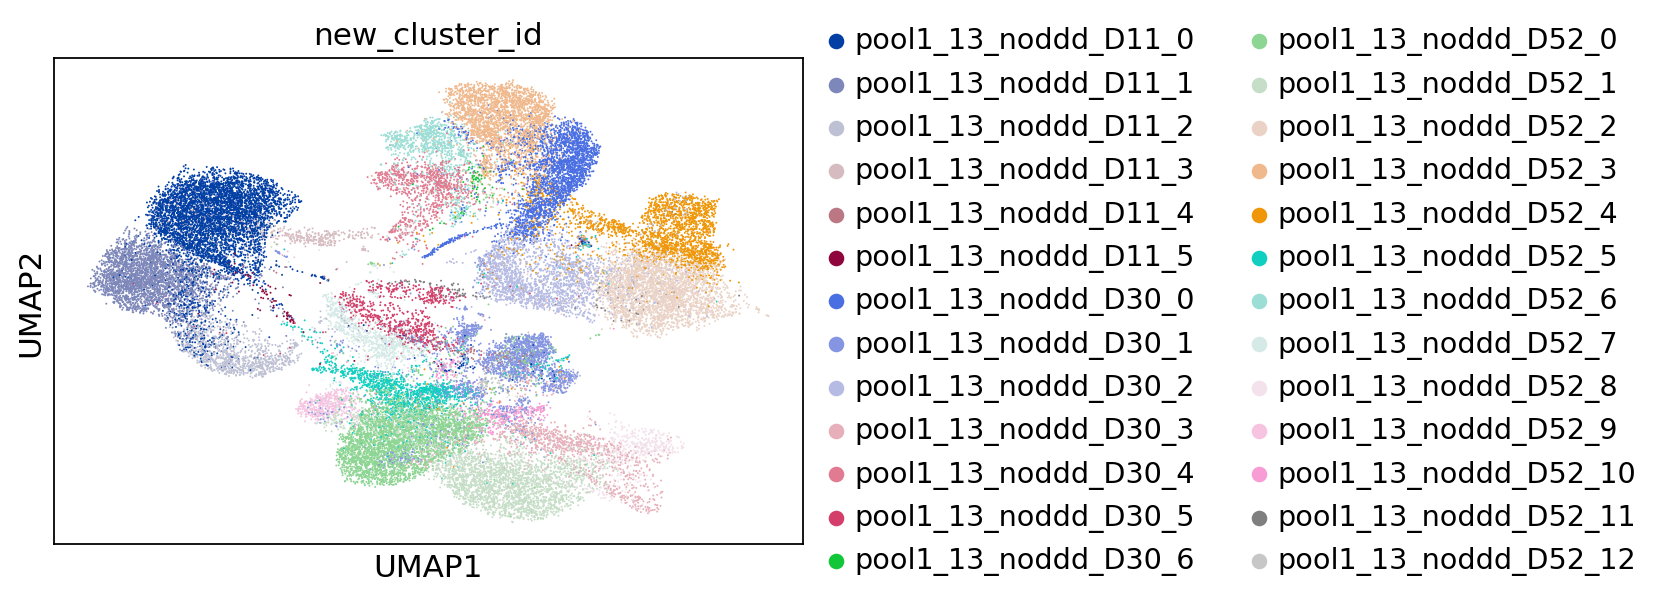

In [52]:
plotting_fcn(adata, color='new_cluster_id', save=fig_prefix+'_tsne_by_cluster_id_louvain.png')

saving figure to file ./figures/umappool1_13_noddd_subsample.scanpy.w_metadata.scanpy.mapped_to_new_clusters_tsne_by_cluster_id_louvain_D52.png


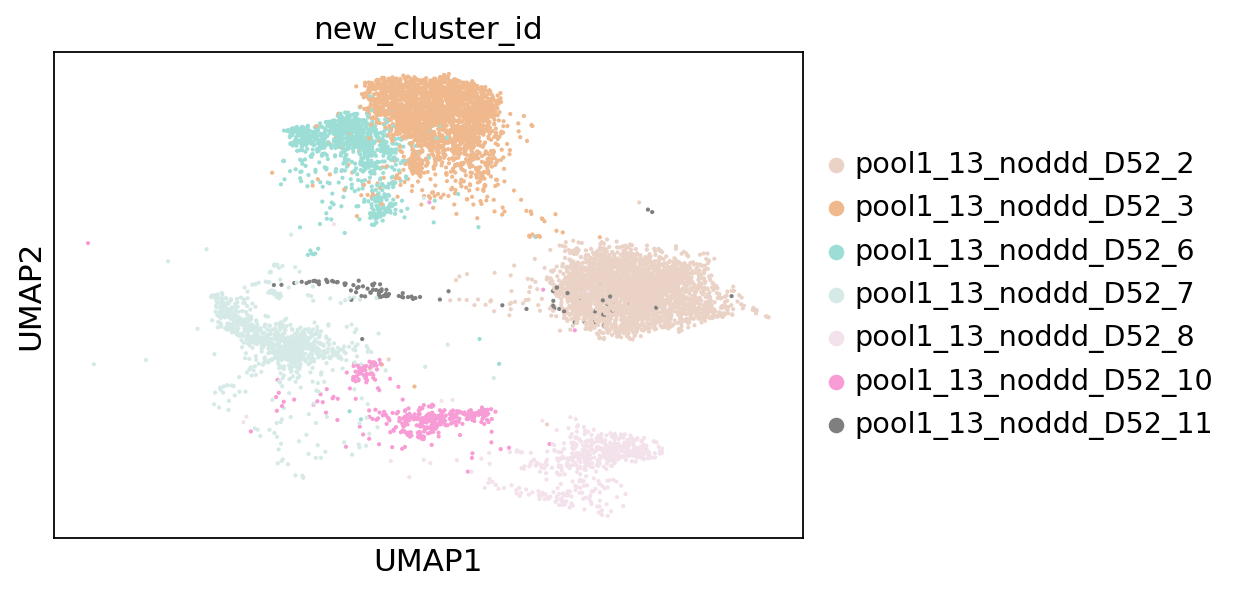

In [58]:
all_D52_clusters = adata.obs.query('time_point=="D52"')['new_cluster_id'].drop_duplicates().tolist()
clusters_to_plot = all_D52_clusters[6:]

plotting_fcn(adata[adata.obs.query('new_cluster_id in @clusters_to_plot').index], color='new_cluster_id', save=fig_prefix+'_tsne_by_cluster_id_louvain_D52.png')
# sc.pl.tsne(adata[adata.obs['time_point']=='D52'], color='treatment', save=fig_prefix+'_tsne_by_cluster_id_treatment_D52.png')

In [51]:
# sc.pl.tsne(adata[adata.obs['time_point']=='D11'], color='louvain', save=fig_prefix+'_tsne_by_cluster_id_louvain_D11.png')


In [ ]:
# gene_combinations = [['TH','CALB1'], ['TH','CALB1','SLC17A6'],['TH','CALB1','SOX6','NDNF'],
#                     ['TH','ALDH1A1'],['TH','ALDH1A1','SOX6','NDNF'],['TH','ALDH1A1','OTX2'],
#                      ['TH','ALDH1A1','OTX2','SLC17A6'],['TH','DDC'],['TH','DDC','SLC18A2']]
gene_combinations = [['TH','DDC'],['TH','DDC','SLC18A2']]


dim_reduction = 'X_tsne'
dim_reduction = 'X_umap'

for gene_list in gene_combinations:
    fig_title = './figures/tsne' + gene_tsne_fig_prefix + '_' + '_'.join(gene_list) + '_combination.png'

    df = pd.DataFrame(adata.raw[:,gene_list].X.toarray(), columns = gene_list)
    cells = df.apply(lambda x: all(x>0), axis=1).values

    # cells = adata.raw[:,'TH'].X * adata.raw[:,'ALDH1A1'].X * adata.raw[:,'SOX6'].X > 0
    # cells = adata.raw[:,'TH'].X * adata.raw[:,'ALDH1A1'].X * adata.raw[:,'NDNF'].X > 0

    print(sum(cells))

    fig = figure()

    scatter(adata.obsm[dim_reduction][:,0],adata.obsm[dim_reduction][:,1], c = 'k' , s=0.5)
    scatter(adata.obsm[dim_reduction][cells,0],adata.obsm[dim_reduction][cells,1], c = 'r' , s=3.0)
#    title(','.join(gene_list) + ': {} cells'.format(sum(cells)))
    title('+'.join(gene_list))
    xticks([])
    yticks([])
    xlabel('tSNE1')
    ylabel('tSNE2')

    fig.savefig(fig_title, dpi=200)

In [ ]:
adata.obs['donor_id'].value_counts()